In [1]:
# Bring data into workspace and replicate plots
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [42]:
df_wage = pd.read_csv("data/wage.csv")

In [43]:
df_wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
year          3000 non-null int64
age           3000 non-null int64
sex           3000 non-null object
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 281.3+ KB


In [44]:
df_wage.describe(include=['object'])

,sex,maritl,race,education,region,jobclass,health,health_ins
count,3000,3000,3000,3000,3000,3000,3000,3000
unique,1,5,4,5,1,2,2,2
top,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes
freq,3000,2074,2480,971,3000,1544,2142,2083


In [45]:
df_education = df_wage.pivot(columns="education", values="wage")

In [46]:
# importing statsmodels library to fit lowess curve through data
import statsmodels.api as sm

In [47]:
df_education.head()

education,1. < HS Grad,2. HS Grad,3. Some College,4. College Grad,5. Advanced Degree
0,75.043154,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,70.476020,NaN
2,NaN,NaN,130.982177,NaN,NaN
3,NaN,NaN,NaN,154.685293,NaN
4,NaN,75.043154,NaN,NaN,NaN


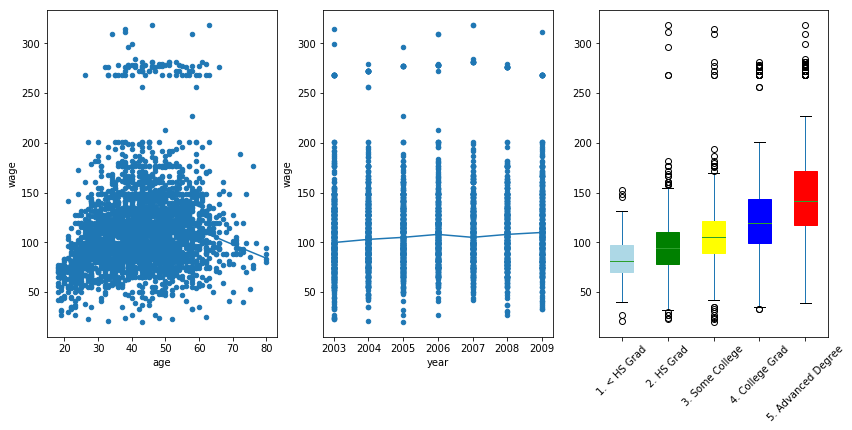

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))
df_wage.plot.scatter('age', 'wage', ax=ax[0])
lowess = sm.nonparametric.lowess(df_wage['wage'], df_wage['age'], frac=.2)
ax[0].plot(lowess[:, 0], lowess[:, 1])

df_wage.plot.scatter("year", "wage", ax=ax[1])
year_median_salary = df_wage.groupby("year")["wage"].median()
ax[1].plot(year_median_salary)

boxplot = df_education.plot.box(ax=ax[2], rot=45, patch_artist=True)
colors = ['lightblue', 'green', 'yellow', 'blue', 'red']
for artist, color in zip(boxplot.artists, colors):
    artist.set_color(color)

In [16]:
df_smarket = pd.read_csv('data/smarket.csv')

In [24]:
df_smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [20]:
import gc

gc.collect()

17340

In [22]:
# Put all lags in one column. Make 'Tidy' Data
df_smarket_pivot = pd.melt(df_smarket, 
                           id_vars='Direction', 
                           value_vars=['Lag1', 'Lag2', 'Lag3'], 
                           var_name='Lag Type', 
                           value_name='Pct Change')

In [25]:
df_smarket_pivot.head()

,Direction,Lag Type,Pct Change
0,Up,Lag1,0.381
1,Up,Lag1,0.959
2,Down,Lag1,1.032
3,Up,Lag1,-0.623
4,Up,Lag1,0.614


In [27]:
import seaborn as sns

/Users/sahluwalia/sage/sage/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/sahluwalia/sage/sage/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


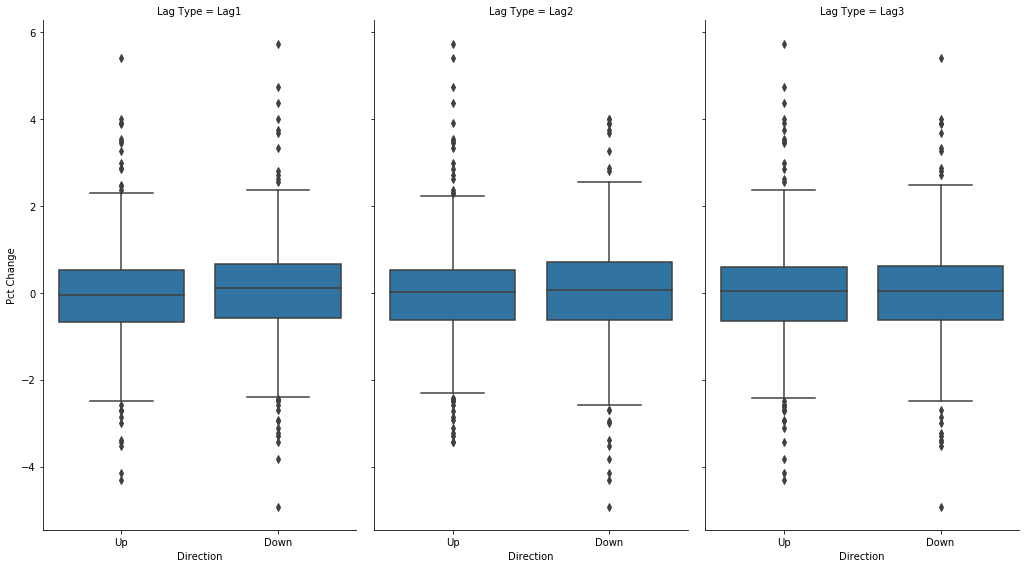

In [28]:
g = sns.FacetGrid(df_smarket_pivot, col="Lag Type", size=8, aspect=.6)
g = g.map(sns.boxplot, "Direction", "Pct Change")

/Users/sahluwalia/sage/sage/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/sahluwalia/sage/sage/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


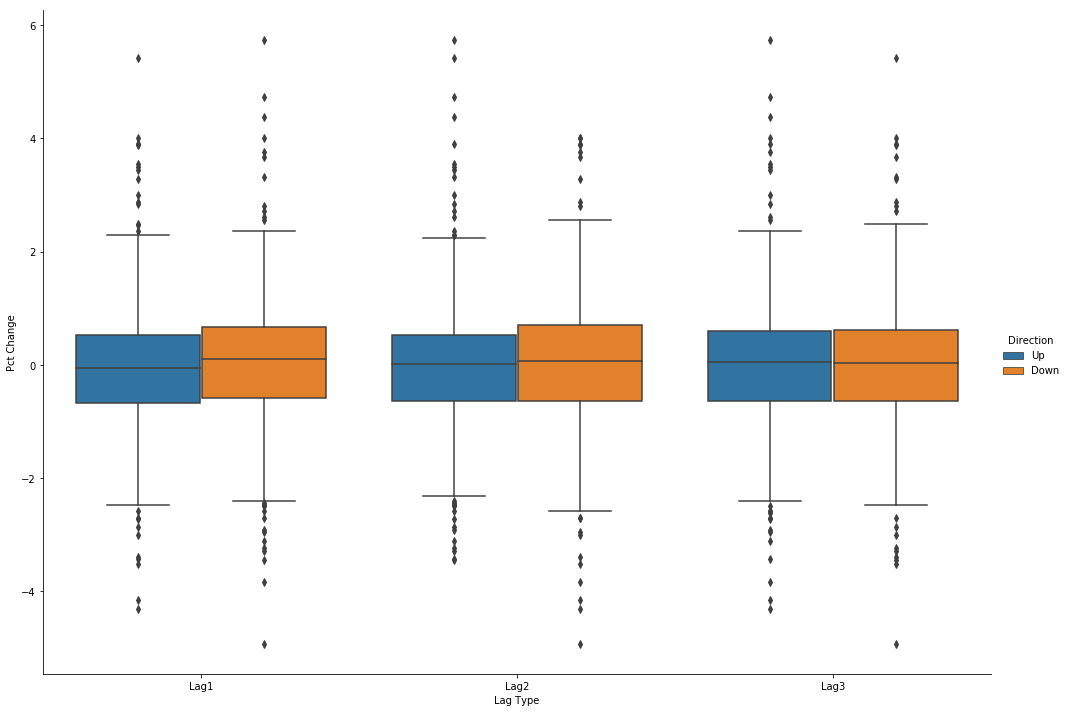

In [30]:
sns.factorplot(x="Lag Type", y="Pct Change", hue="Direction", 
               data=df_smarket_pivot, kind="box", size=10, aspect=1.4)

In [31]:
del df_smarket
del df_smarket_pivot

In [34]:
df_adv = pd.read_csv('data/Advertising.csv')
df_adv.head(10)
# gc.collect()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [35]:
df_ad_new = pd.melt(df_adv, value_vars=['TV', 'Radio', 'Newspaper'], 
                    id_vars="Sales", value_name="advertising_budget")

In [37]:
df_ad_new.tail()

,Sales,variable,advertising_budget
595,7.6,Newspaper,13.8
596,9.7,Newspaper,8.1
597,12.8,Newspaper,6.4
598,25.5,Newspaper,66.2
599,13.4,Newspaper,8.7


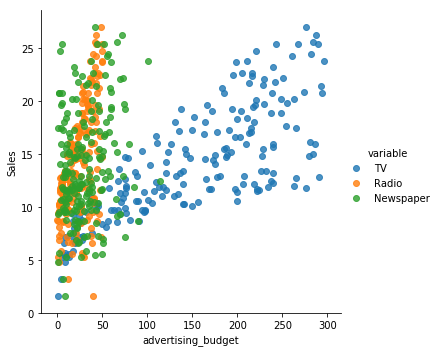

In [38]:
sns.lmplot('advertising_budget', 'Sales', data = df_ad_new, hue='variable', fit_reg=False)

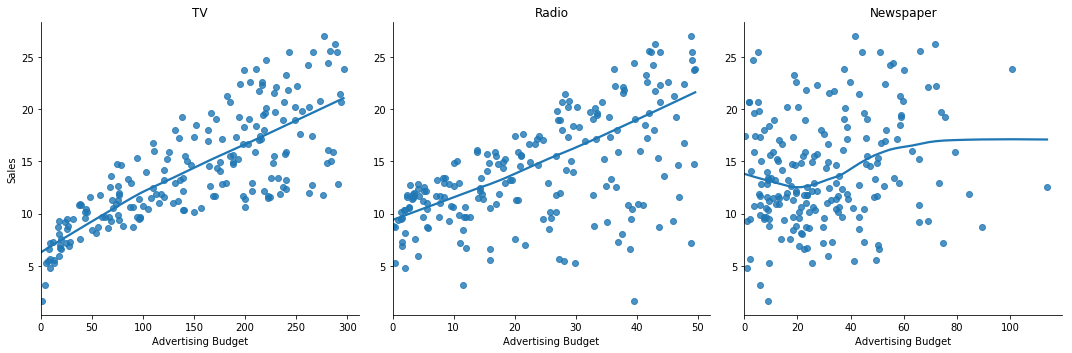

In [52]:
lm = sns.lmplot('advertising_budget', 'Sales', 
                data=df_ad_new, col='variable', sharey=False, sharex=False, lowess=True);
axes = lm.axes
for i, ax in enumerate(axes[0]):
    ax.set_xlim(0,)
    ax.set_title(lm.col_names[i])
    ax.set_xlabel("Advertising Budget")

In [53]:
df_college = pd.read_csv('data/college.csv', index_col=0)
df_college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


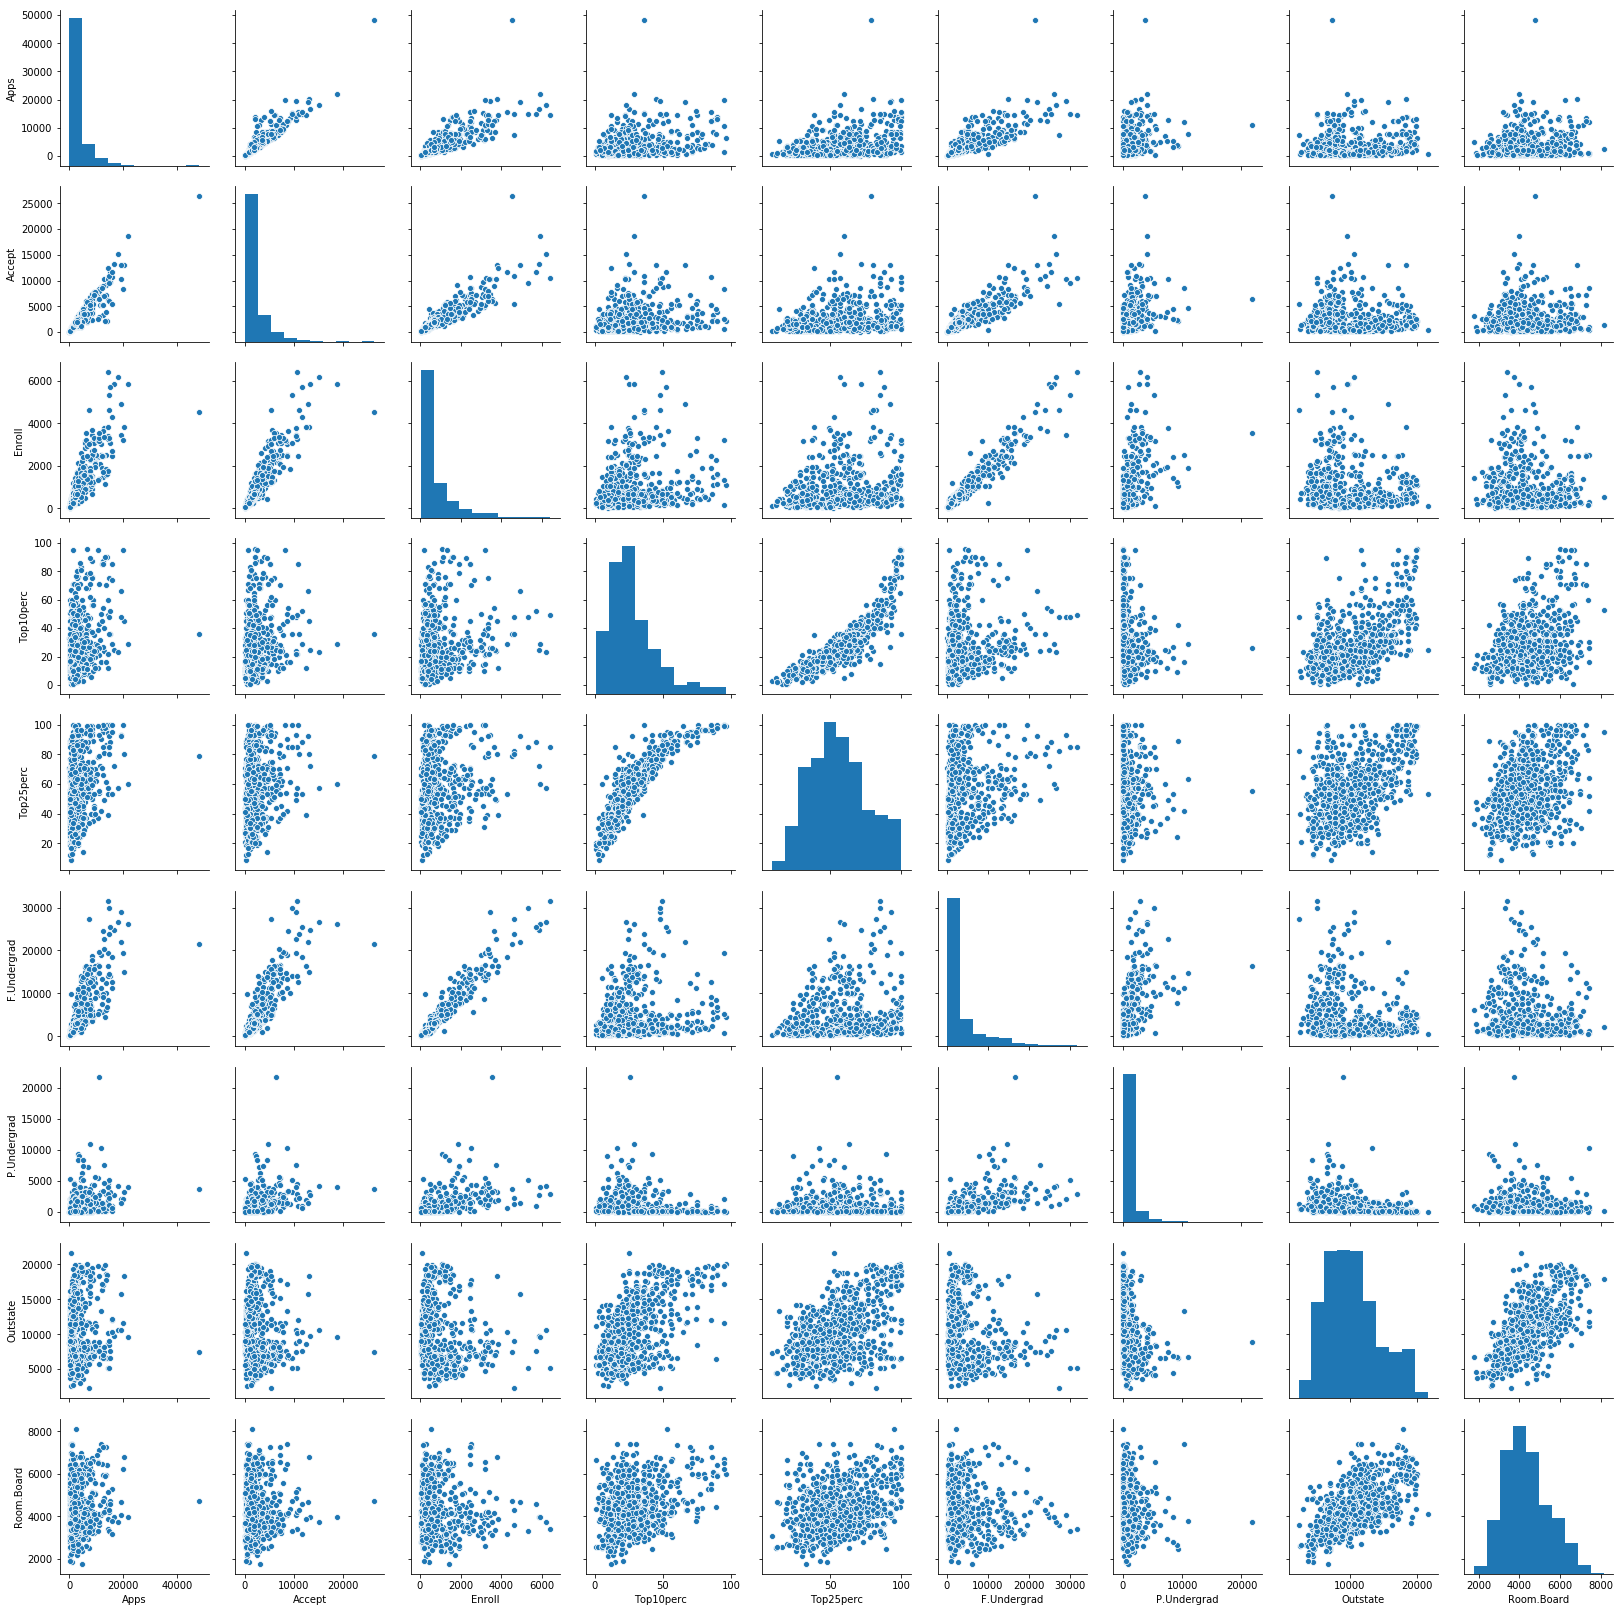

In [54]:
sns.pairplot(df_college.iloc[:, :10])

Text(0.5, 1.0, 'Percentage Accepted')

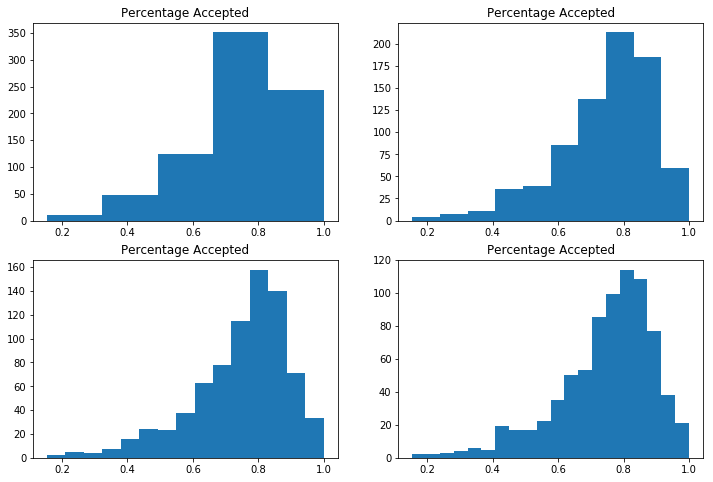

In [56]:
fix_c, ax_c = plt.subplots(2, 2, figsize=(12,8))

ax_c[0, 0].hist(df_college['Accept'] / df_college['Apps'] , bins=5)
ax_c[0, 0].set_title('Percentage Accepted')


ax_c[0, 1].hist(df_college['Accept'] / df_college['Apps'] , bins=10)
ax_c[0, 1].set_title('Percentage Accepted')


ax_c[1, 0].hist(df_college['Accept'] / df_college['Apps'] , bins=15)
ax_c[1, 0].set_title('Percentage Accepted')


ax_c[1, 1].hist(df_college['Accept'] / df_college['Apps'] , bins=20)
ax_c[1, 1].set_title('Percentage Accepted')

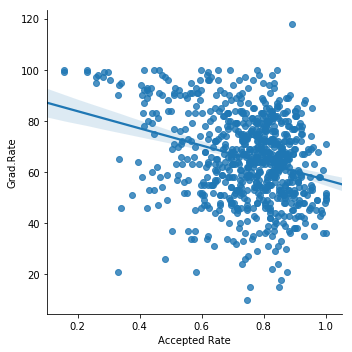

In [57]:
df_college["Accepted Rate"] = df_college["Accept"] / df_college["Apps"]
sns.lmplot('Accepted Rate', 'Grad.Rate', data=df_college);